## Exploring Fancy Indexing

In [1]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)   
print(x)   # Array

[51 92 14 71 60 20 82 86 74 74]


In [2]:
[x[3], x[7], x[2]]    # List

[71, 86, 14]

In [3]:
x[3]

71

In [4]:
ind = [3, 7, 4]     # List
x[ind]   # Array

array([71, 86, 60])

In [5]:
x

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74])

In [9]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [10]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [12]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

In [13]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [14]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

## Combined Indexing

In [15]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [16]:
X[2, [2, 0, 1]]

array([10,  8,  9])

In [17]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [19]:
X[1:, 1:]

array([[ 5,  6,  7],
       [ 9, 10, 11]])

In [20]:
X[:2, :2]

array([[0, 1],
       [4, 5]])

In [21]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

## Example: Selecting Random Points

In [37]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # for plot styling

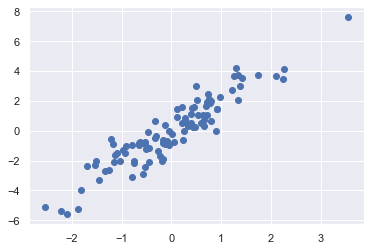

In [38]:
plt.scatter(X[:, 0], X[:, 1])

In [39]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([66, 30, 50, 70, 98, 35, 59, 47,  6, 95, 89, 64, 25, 84, 94, 26, 63,
       53, 37, 60])

In [40]:
selection = X[indices]  # fancy indexing here (broadcasting 1 dim => 2 dim)
selection.shape

(20, 2)

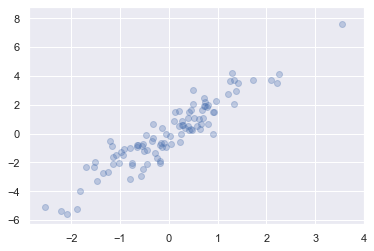

In [41]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1], facecolor='none', s=200)

## Modifying Values with Fancy Indexing

In [44]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [45]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [46]:
# Some potential for unexpected results...
x = np.zeros(10)
x[[0, 0]] = [4, 6]   # Updates to 4, then 6
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [47]:
# consider this.
i = [2, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [48]:
x = np.zeros(10)
np.add.at(x, i, 1)   # at() method does an in-place application of the given operator at the specified indices
print(x)

[0. 0. 1. 1. 3. 0. 0. 0. 0. 0.]


## Example: Binning Data

In [49]:
np.random.seed(42)
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
  


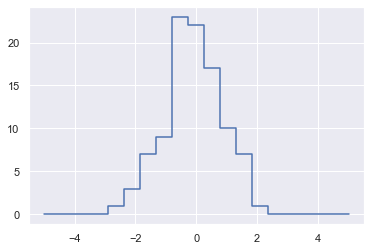

In [51]:
# plot the results
plt.plot(bins, counts, linestyle='steps')

In [52]:
bins

array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
       -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
        0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
        2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ])

In [53]:
counts

array([ 0.,  0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,
        7.,  1.,  0.,  0.,  0.,  0.,  0.])

In [54]:
x

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
       -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
       -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
        1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
        0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
       -0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
       -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
        0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
       -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016,
        0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
        0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513,
       -0.47917424, -0.18565898, -1.10633497, -1.19620662,  0.81252582,
        1.35624003, -0.07201012,  1.0035329 ,  0.36163603, -0.64

In [55]:
i

array([11, 10, 11, 13, 10, 10, 13, 11,  9, 11,  9,  9, 10,  6,  7,  9,  8,
       11,  8,  7, 13, 10, 10,  7,  9, 10,  8, 11,  9,  9,  9, 14, 10,  8,
       12,  8, 10,  6,  7, 10, 11, 10, 10,  9,  7,  9,  9, 12, 11,  7, 11,
        9,  9, 11, 12, 12,  8,  9, 11, 12,  9, 10,  8,  8, 12, 13, 10, 12,
       11,  9, 11, 13, 10, 13,  5, 12, 10,  9, 10,  6, 10, 11, 13,  9,  8,
        9, 12, 11,  9, 11, 10, 12,  9,  9,  9,  7, 11, 10, 10, 10])

(array([ 0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,  7.,
         1.,  0.,  0.,  0.,  0.,  0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 <a list of 1 Patch objects>)

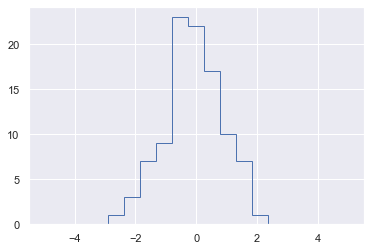

In [56]:
# Done in a single line
plt.hist(x, bins, histtype='step')

In [57]:
# To compute the binning, Matplotlib uses the np.histogram function, which does a 
# very similar computation to what we did before.
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)
print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
24.5 µs ± 1.02 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custom routine:
14.6 µs ± 276 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


np.histogram??
It's quite a bit more involved than the simple search-and-count. This is because NumPy's algorithm is more flexible, and particularly is designed for better performance when the number of data points becomes large:

In [59]:
x = np.random.randn(1000000)
print("NumPy routing:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routing:
65.5 ms ± 690 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
100 ms ± 627 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
